In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Imprt preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
# Import Algo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import metrics
from sklearn.metrics import confusion_matrix,classification_report,r2_score

2024-10-17 18:45:51.594311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#in case there is a ModuleNotFound error
#!pip install tensorflow

In [37]:
%time df = pd.read_csv("data.csv")

CPU times: user 11.8 ms, sys: 11.3 ms, total: 23 ms
Wall time: 27.5 ms


In [38]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


The values in the columns seem believable based on mean, min and max values. The counts are also in line with the number of rows except for the last Unnamed column.

In [40]:
df.iloc[3]

id                         84348301
diagnosis                         M
radius_mean                   11.42
texture_mean                  20.38
perimeter_mean                77.58
area_mean                     386.1
smoothness_mean              0.1425
compactness_mean             0.2839
concavity_mean               0.2414
concave points_mean          0.1052
symmetry_mean                0.2597
fractal_dimension_mean      0.09744
radius_se                    0.4956
texture_se                    1.156
perimeter_se                  3.445
area_se                       27.23
smoothness_se               0.00911
compactness_se              0.07458
concavity_se                0.05661
concave points_se           0.01867
symmetry_se                 0.05963
fractal_dimension_se       0.009208
radius_worst                  14.91
texture_worst                  26.5
perimeter_worst               98.87
area_worst                    567.7
smoothness_worst             0.2098
compactness_worst           

In [41]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [42]:
df.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [43]:
#No valued in Unnamed: 32 column so drop it directly
df.drop("Unnamed: 32",axis=1,inplace=True)

#Drop the id column since it is only used for identification and is not a feature
df.drop("id",axis=1,inplace=True)

In [44]:
df.head().T

,0,1,2,3,4
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


In [45]:
df.shape

(569, 31)

In [46]:
#Encode the diagnosis column
encoder = LabelEncoder()
df.diagnosis = encoder.fit_transform(df.diagnosis)

In [47]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: >

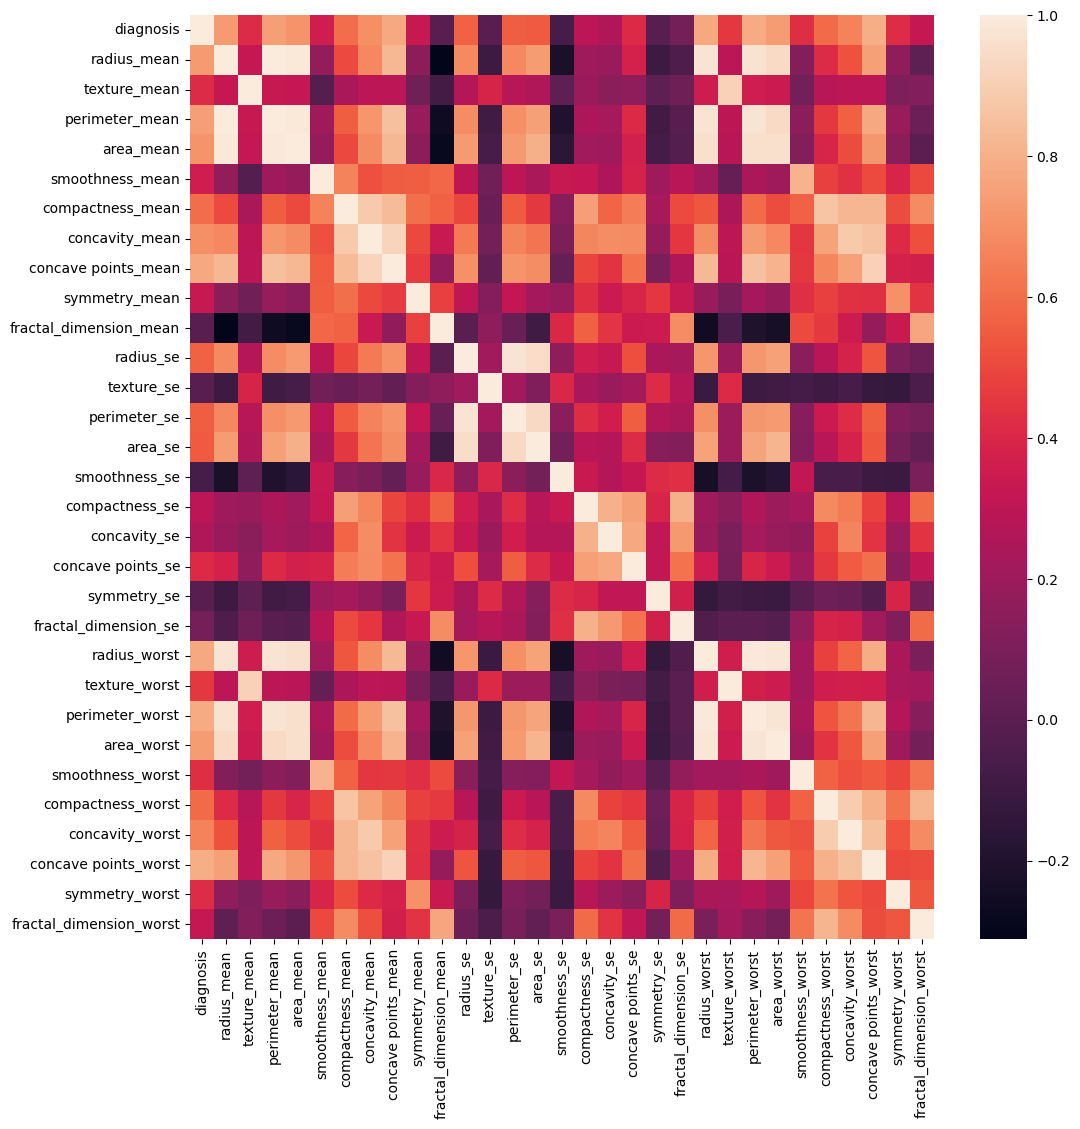

In [48]:
cor = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor)

In [49]:
#Feature Engineering

X = df.drop(columns="diagnosis")
y = df.diagnosis

## Logistic Regression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

[[117   4]
 [  4  63]]


Normalize the data to improve model performance

In [55]:
from sklearn import preprocessing

In [56]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [57]:
X_scaled = scaler.transform(X_train)

In [58]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_scaled,y_train)

LogisticRegression()

In [59]:
predictions_1 = logmodel_1.predict(X_test)
print(classification_report(y_test,predictions_1))
print(confusion_matrix(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.36      1.00      0.53        67

    accuracy                           0.36       188
   macro avg       0.18      0.50      0.26       188
weighted avg       0.13      0.36      0.19       188

[[  0 121]
 [  0  67]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam

Model performance could deteriorate after scaling the data due to these reasons:
1. Outlier Sensitivity: Standardization can sometimes amplify the effect of outliers, potentially leading to decreased model performance3.
2. Loss of Information: In some cases, the original scale of features may contain valuable information that is lost during standardization3.
3. Numeric Instability: Standardization might introduce numeric instability in certain datasets, potentially harming the model's assumptions or introducing non-linearity

## Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree = DecisionTreeClassifier()

In [62]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
predictions_2 = dtree.predict(X_test)
print(classification_report(y_test,predictions_2))
print(confusion_matrix(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       121
           1       0.85      0.93      0.89        67

    accuracy                           0.91       188
   macro avg       0.90      0.92      0.91       188
weighted avg       0.92      0.91      0.92       188

[[110  11]
 [  5  62]]


## Random Forests

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
rfc_pred = rfc.predict(X_test)

In [66]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       121
           1       0.95      0.94      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

[[118   3]
 [  4  63]]


## Neural Network

In [82]:
model = Sequential([
Dense(128,activation='relu',input_dim=X_train.shape[1]),
Dense(64,activation='relu'),
Dense(32,activation='relu'),
Dense(1,activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


history = model.fit(X_train,y_train,epochs=100,batch_size=4,validation_split=0.2,verbose=1)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6576 - loss: 6.4852 - val_accuracy: 0.8961 - val_loss: 0.5356
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8157 - loss: 1.4306 - val_accuracy: 0.8182 - val_loss: 0.8361
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.9099 - val_accuracy: 0.9091 - val_loss: 0.5221
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 1.6162 - val_accuracy: 0.8831 - val_loss: 0.9076
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 1.4105 - val_accuracy: 0.7143 - val_loss: 1.6341
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8225 - loss: 1.1400 - val_accuracy: 0.8182 - val_loss: 1.2065
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 1.0232 - val_accuracy: 0.7403 - val_loss: 1.2258
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 1.0521 - val_accuracy: 0.8571 - val_loss: 0.8

In [83]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

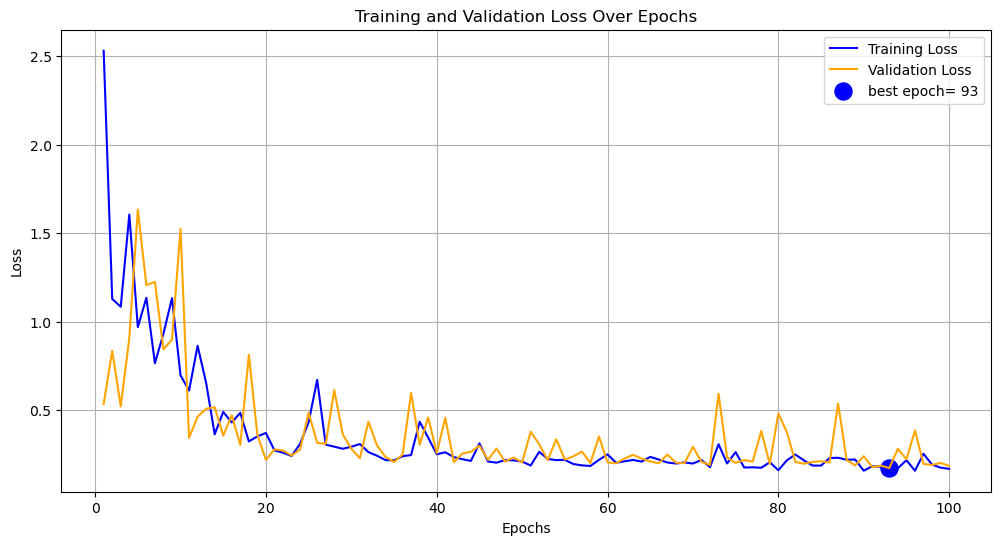

In [84]:
import matplotlib.pyplot as plt

epochs = range(1, len(training_loss) + 1)
index_loss = np.argmin(validation_loss)
val_lowest = validation_loss[index_loss]
loss_label = f'best epoch= {str(index_loss + 1)}'

plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
nn_pred = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [86]:
print(classification_report(y_test,binary_predictions))
print(confusion_matrix(y_test,binary_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

[[117   4]
 [  4  63]]
